<a href="https://colab.research.google.com/github/akkaya99/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

In [ ]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Calculating the number of unique labels in the training set
num_labels = len(np.unique(y_train))

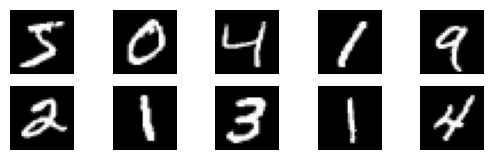

In [ ]:
for i in range(10):
  ax = plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap= "gray")
  plt.axis("off")

In [ ]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for i in range(10):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap= "gray") # Displaying the image at index i from the training set
    plt.axis("off") # Removing axis labels

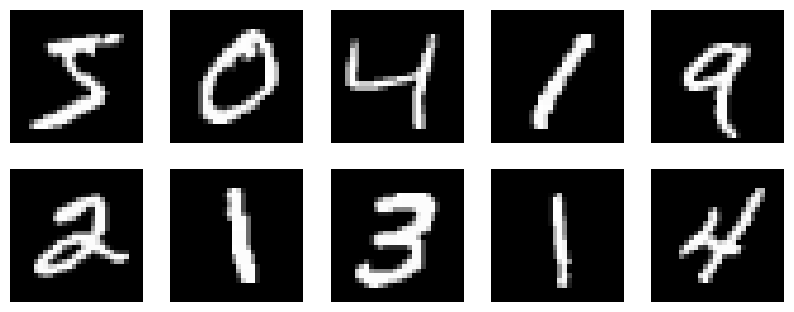

In [ ]:
visualize_img(x_train)

In [ ]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
x_train[2][10,10]

0

In [ ]:
x_train[2][14,10]

49

In [ ]:
x_train[2].sum()

19443

In [ ]:
x_train[2][14:20, 10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [ ]:
x_train[2][14:20, 10:20].mean()

96.51666666666667

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12)) # Create a new figure with a specified size
  ax = fig.add_subplot(111)  # Add a subplot to the figure
  ax.imshow(img, cmap="gray")
  width, height = img.shape

  threshold = img.max() / 2.5 # Calculate the threshold for annotation color

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)),xy=(y,x),color ="white" if img[x][y] <threshold else "black") # Annotate each pixel with its value

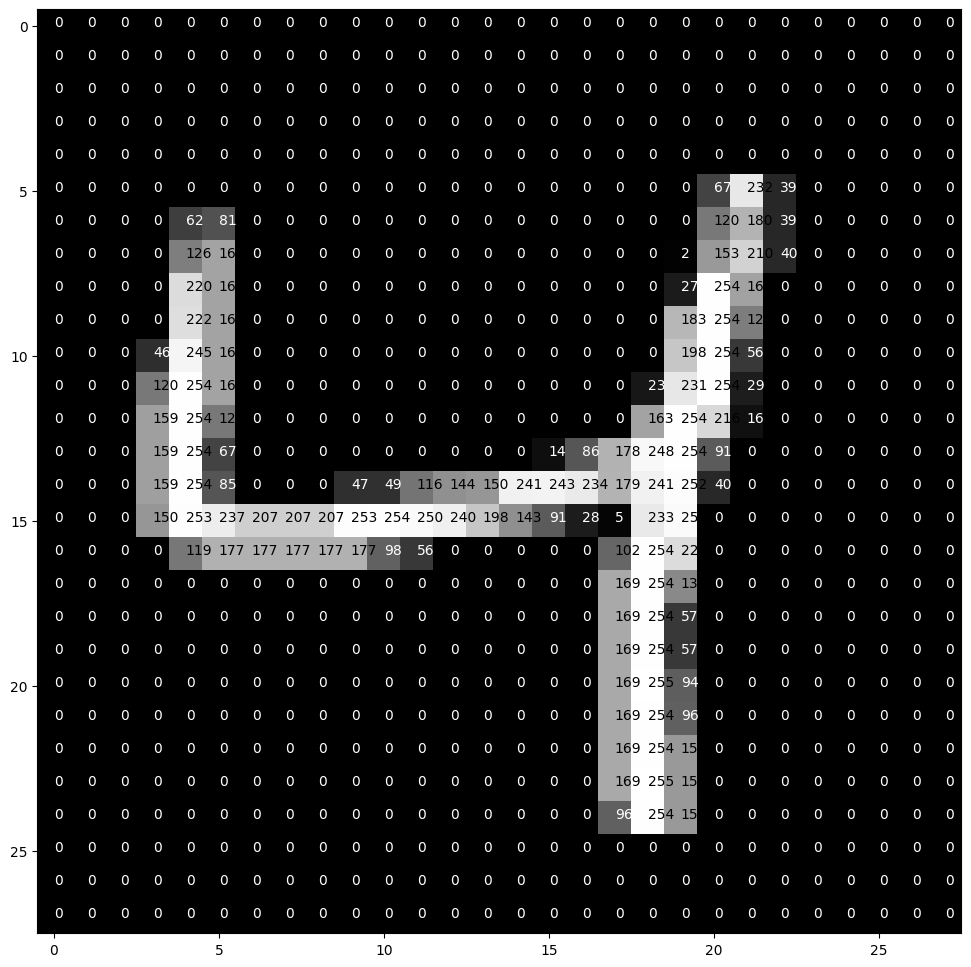

In [ ]:
pixel_visualize(x_train[2])

In [ ]:
y_train = to_categorical(y_train)
y_test =to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Normalization
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#Standardization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
#Modeling
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation="relu", name="layer1"), #hidden layer 128: neuron number
    Dense(units=num_labels, activation="softmax", name="output_layer")])

model.compile(loss="categorical_crossentropy", #for multiple classes
              optimizer="adam", #optimizer algorithm makes loss function min.
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),"accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3590 - precision: 0.9467 - recall: 0.8485 - accuracy: 0.8996 - val_loss: 0.1980 - val_precision: 0.9573 - val_recall: 0.9307 - val_accuracy: 0.9428
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1662 - precision: 0.9640 - recall: 0.9422 - accuracy: 0.9527 - val_loss: 0.1431 - val_precision: 0.9659 - val_recall: 0.9505 - val_accuracy: 0.9574
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1177 - precision: 0.9740 - recall: 0.9592 - accuracy: 0.9665 - val_loss: 0.1198 - val_precision: 0.9692 - val_recall: 0.9592 - val_accuracy: 0.9637
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0903 - precision: 0.9790 - recall: 0.9690 - accuracy: 0.9739 - val_loss: 0.0966 - val_precision: 0.9755 - val_recall: 0.9662 - val_accuracy: 0.9698
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0728 - precision: 0.9827 - r

In [ ]:
# Model Evaluation
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" %(100 * acc))
print("\nTest Loss: %.1f%%" %(100 * loss))
print("\nTest Precision: %.1f%%" %(100 * precision))
print("\nTest Recall: %.1f%%" %(100 * recall))

In [ ]:
model.save("mnist_model.h5")
import random
random = random.randint(0, x_test.shape[0])

In [ ]:
random

8822

In [ ]:
test_image = x_test[random]

In [ ]:
y_test[random]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

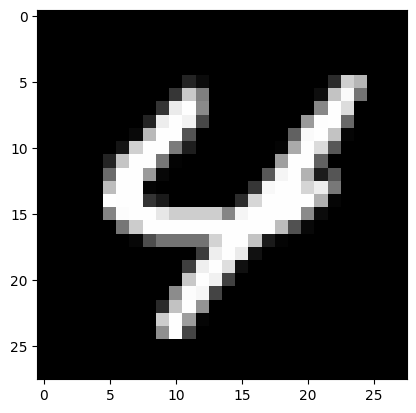

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap="gray");

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
#Prediction
probability = model.predict(test_data)

1/1 [==============================] - 0s 284ms/step


In [ ]:
predicted_classes = np.argmax(probability)

In [ ]:
predicted_classes

4